In [2]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import *

In [4]:
from fast_tools import get_all_tapes


In [13]:
# load csv of tape data
raw_data = read_merged_data(124)

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

In [22]:
merged_tapes = pd.concat(raw_data, axis = 0)
merged_tapes.head()

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,alpha,beta,LOB,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price
combined_time,,,,,,,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,"[['bid', [[1, 6]]], ['ask', []]]",NaN,NaN,1.0,NaN,NaN,NaN
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],0.002986,0.015020,"[['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1...",529.0,797.0,261.0,NaN,NaN,NaN
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,0.238553,0.165031,"[['bid', [[262, 6], [261, 1]]], ['ask', [[297,...",279.5,297.0,262.0,NaN,NaN,NaN
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],0.524854,0.429582,"[['bid', [[264, 6], [261, 1]]], ['ask', [[291,...",277.5,291.0,264.0,NaN,NaN,NaN
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,0.820913,0.541382,"[['bid', [[264, 6], [261, 1]]], ['ask', [[286,...",275.0,286.0,264.0,NaN,NaN,NaN


In [63]:
# investigate if volatility of previous day is good indicator for the next day
tapes_summ = pd.DataFrame()

for data in raw_data:
    avg_price = data["Tapes Price"].mean()
    vol = data["Volume"].sum()
    trend = data["Tapes Price"].diff().mean()
    std = data["Tapes Price"].std(skipna=True)
    min = data["Tapes Price"].min()
    q25 = data["Tapes Price"].quantile(0.25)
    q50 = data["Tapes Price"].quantile(0.50)
    q75 = data["Tapes Price"].quantile(0.75)
    max = data["Tapes Price"].max()
    tapes_summ = tapes_summ.append({"Avg_Price": avg_price, "Volume": vol, "Trend": trend, "Std": std, "Min": min, "Q25": q25, "Q50": q50, "Q75": q75, "Max": max}, ignore_index=True)

C:\Users\benjo\AppData\Local\Temp\ipykernel_3200\2266642809.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tapes_summ = tapes_summ.append({"Avg_Price": avg_price, "Volume": vol, "Trend": trend, "Std": std, "Min": min, "Q25": q25, "Q50": q50, "Q75": q75, "Max": max}, ignore_index=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_3200\2266642809.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tapes_summ = tapes_summ.append({"Avg_Price": avg_price, "Volume": vol, "Trend": trend, "Std": std, "Min": min, "Q25": q25, "Q50": q50, "Q75": q75, "Max": max}, ignore_index=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_3200\2266642809.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tapes_summ = tapes_summ.append({"Avg

In [64]:
tapes_summ.head()

,Avg_Price,Volume,Trend,Std,Min,Q25,Q50,Q75,Max
0,281.188805,47973.0,-0.320831,12.680389,243.0,272.2,285.25,290.500000,303.0
1,296.257038,51992.0,-0.378795,7.569629,270.0,291.0,296.00,301.166667,317.0
2,311.779133,48047.0,-0.337496,14.013103,276.0,300.0,313.00,323.000000,346.0
3,356.327060,44335.0,-0.277864,16.719002,317.0,339.5,359.00,371.000000,387.0
4,335.710148,44859.0,-0.234378,13.349905,303.0,325.8,334.00,346.000000,374.0


In [31]:
from pmdarima.arima import auto_arima

# ARIMA model
model = auto_arima(tapes_summ["Std"][:100], seasonal=False, stepwise=True, suppress_warnings=True)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -247.590
Date:                Thu, 21 Mar 2024   AIC                            509.180
Time:                        11:00:07   BIC                            527.346
Sample:                             0   HQIC                           516.530
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3404      0.170     -2.004      0.045      -0.673      -0.007
ar.L1         -1.6392      0.035    -46.935      0.000      -1.708      -1.571
ar.L2         -0.9610      0.034    -28.204      0.000      -1.028      -0.894
ma.L1          0.8116      0.128      6.330      0.000       0.560       1.063
ma.L2         -0.5653      0.119     -4.767      0.000      -0.798      -0.333
ma.L3         -0.8237      0.109     -7.548      0.000      -1.038      -0.610
sigma2         8.3625      1.132      7.385      0.000       6.143      10.582
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                43.55
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

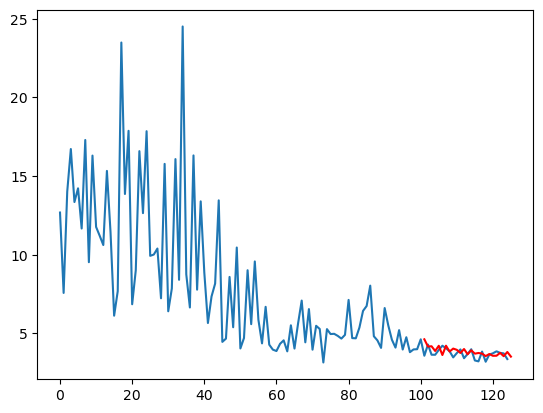

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA model
model_auto = ARIMA(tapes_summ["Std"][:100], order=(2, 1, 3))
result = model_auto.fit()

result_pred = result.apply(tapes_summ["Std"][100:],refit=False)
predictions = result_pred.predict(start=0, end=25)

plt.plot(tapes_summ["Std"])
plt.plot(predictions[1:], color="red")


In [62]:
from pmdarima.arima import auto_arima

# ARIMA model
model = auto_arima(tapes_summ["Std"][25:], seasonal=False, stepwise=True, suppress_warnings=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -200.666
Date:                Thu, 21 Mar 2024   AIC                            419.333
Time:                        11:31:33   BIC                            442.689
Sample:                             0   HQIC                           428.783
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9354      0.078    -11.937      0.000      -1.089      -0.782
ar.L2         -1.1039      0.060    -18.471      0.000      -1.221      -0.987
ar.L3         -0.9900      0.085    -11.611      0.000      -1.157      -0.823
ar.L4         -0.7861      0.057    -13.883      0.000      -0.897      -0.675
ma.L1          0.0413      0.129      0.320      0.749      -0.212       0.294
ma.L2          0.5980      0.210      2.852      0.004       0.187       1.009
ma.L3          0.3608      0.183      1.974      0.048       0.003       0.719
ma.L4         -0.2943      0.129     -2.276      0.023      -0.548      -0.041
sigma2         3.1122      0.572      5.440      0.000       1.991       4.233
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               175.71
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\benjo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


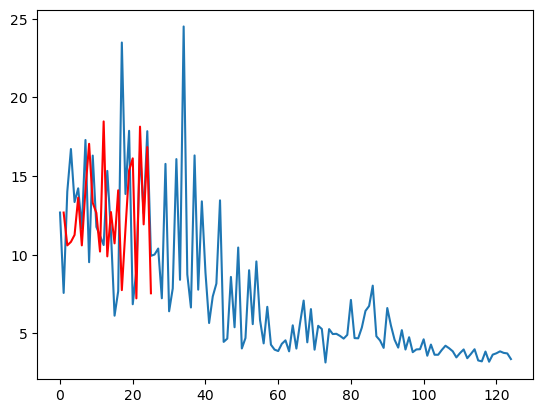

In [67]:
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA model
model_auto = ARIMA(tapes_summ["Std"][25:], order=(4, 1, 4))
result = model_auto.fit()

result_pred = result.apply(tapes_summ["Std"][:25],refit=False)
predictions = result_pred.predict(start=0, end=25)

plt.plot(tapes_summ["Std"])
plt.plot(predictions[1:], color="red")